In [2]:
# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('adult_data.csv')
df.columns = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
             'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']

In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
def handle_capital_gain(df):
    df['capital_gain'] = np.where(df['capital_gain'] == 0, np.nan, df['capital_gain'])
    df['capital_gain'] = np.log(df['capital_gain'])
    df['capital_gain'] = df['capital_gain'].replace(np.nan, 0)

In [8]:
handle_capital_gain(df)

In [9]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0,40,Cuba,<=50K


In [10]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,0.734601,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,2.454680,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,11.512915,4356.000000,99.000000


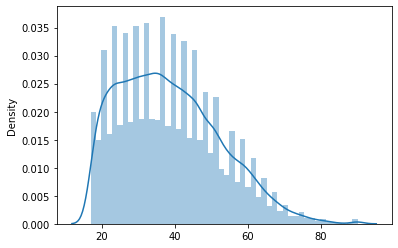

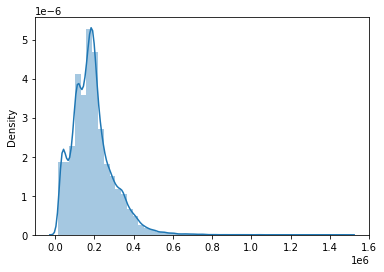

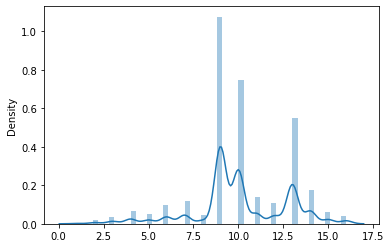

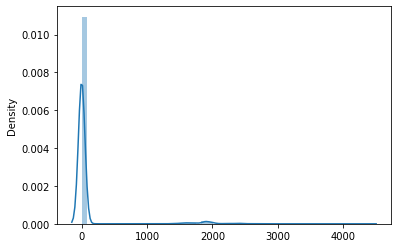

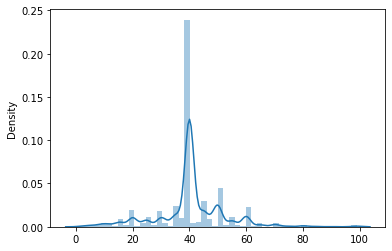

In [11]:
for i in df.columns:
    if df.dtypes[i]== ('int64' or 'float64'):
        sns.distplot(x = df[i])
        plt.show()

In [12]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [13]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

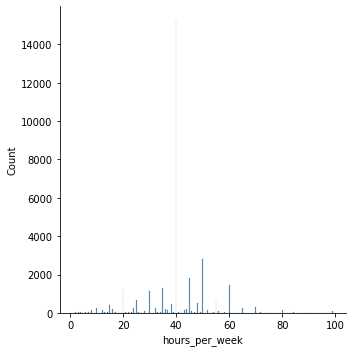

In [15]:
sns.displot(df['hours_per_week'])
plt.show()

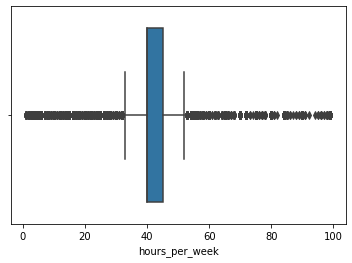

In [16]:
sns.boxplot(df['hours_per_week'])
plt.show()

In [17]:
def remove_outlier_hours_per_week(df):
    IQR = df['hours_per_week'].quantile(0.75) - df['hours_per_week'].quantile(0.25)
    
    lower_range = df['hours_per_week'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['hours_per_week'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['hours_per_week'] <= lower_range, 'hours_per_week'] = lower_range
    df.loc[df['hours_per_week'] >= upper_range, 'hours_per_week'] = upper_range

In [18]:
remove_outlier_hours_per_week(df)

<AxesSubplot:xlabel='hours_per_week'>

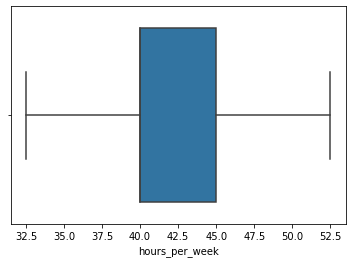

In [19]:
sns.boxplot(df['hours_per_week'])

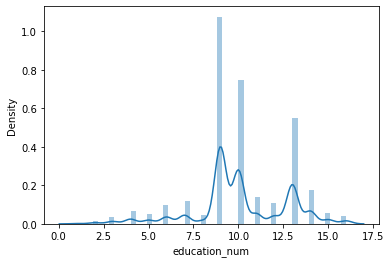

In [22]:
sns.distplot(df['education_num'])
plt.show()

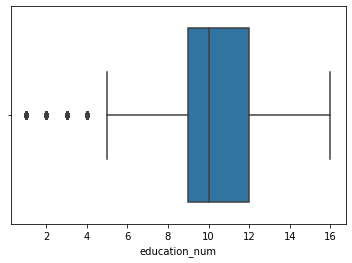

In [24]:
sns.boxplot(df['education_num'])
plt.show()

In [25]:
def remove_outlier_education_num(df):
    IQR = df['education_num'].quantile(0.75) - df['education_num'].quantile(0.25)
    
    lower_range = df['education_num'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['education_num'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['education_num'] <= lower_range, 'education_num'] = lower_range
    df.loc[df['education_num'] >= upper_range, 'education_num'] = upper_range

In [26]:
remove_outlier_education_num(df)

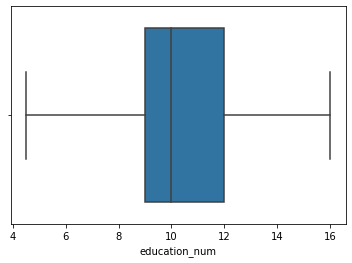

In [27]:
sns.boxplot(df['education_num'])
plt.show()

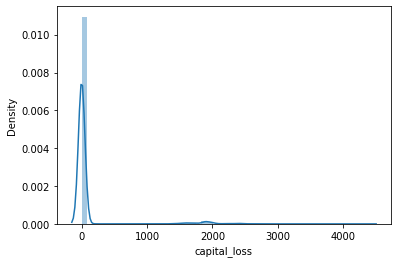

In [28]:
sns.distplot(df['capital_loss'])
plt.show()

In [29]:
def capital_loss_log(df):
    df['capital_loss'] = np.where(df['capital_loss'] == 0, np.nan, df['capital_loss'])
    df['capital_loss'] = np.log(df['capital_loss'])
    df['capital_loss'] = df['capital_loss'].replace(np.nan, 0)

In [30]:
capital_loss_log(df)

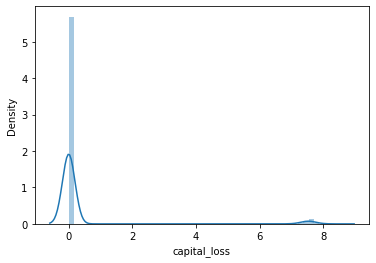

In [31]:
sns.distplot(df['capital_loss'])
plt.show()

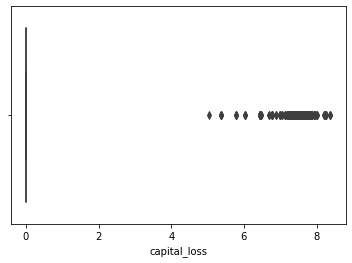

In [32]:
sns.boxplot(df['capital_loss'])
plt.show()

In [33]:
def remove_outlier_capital_loss(df):
    IQR = df['capital_loss'].quantile(0.75) - df['capital_loss'].quantile(0.25)
    
    lower_range = df['capital_loss'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['capital_loss'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['capital_loss'] <= lower_range, 'capital_loss'] = lower_range
    df.loc[df['capital_loss'] >= upper_range, 'capital_loss'] = upper_range

In [34]:
remove_outlier_capital_loss(df)

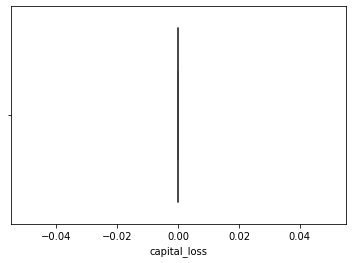

In [36]:
sns.boxplot(df['capital_loss'])
plt.show()

In [37]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.0,32561.000000
mean,38.581647,1.897784e+05,10.124321,0.734601,0.0,41.202451
std,13.640433,1.055500e+05,2.459770,2.454680,0.0,6.187005
min,17.000000,1.228500e+04,4.500000,0.000000,0.0,32.500000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.0,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.0,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.0,45.000000
max,90.000000,1.484705e+06,16.000000,11.512915,0.0,52.500000


In [38]:
df['sex'] = np.where(df['sex'] == " Male", 1, 0)

In [40]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,1,7.684324,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,1,0.000000,0.0,32.5,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,1,0.000000,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0.000000,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,0,0.000000,0.0,40.0,Cuba,<=50K


In [51]:
categorical_columns = ['race','relationship','occupation','marital_status','education','workclass','native_country']
for column in categorical_columns:
    tempdf = pd.get_dummies(df[column], prefix=column)
    df = pd.merge(
        left=df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)
print(df)

       age  fnlwgt  education_num  sex  capital_gain  capital_loss  \
0       39   77516           13.0    1      7.684324           0.0   
1       50   83311           13.0    1      0.000000           0.0   
2       38  215646            9.0    1      0.000000           0.0   
3       53  234721            7.0    1      0.000000           0.0   
4       28  338409           13.0    0      0.000000           0.0   
...    ...     ...            ...  ...           ...           ...   
32556   27  257302           12.0    0      0.000000           0.0   
32557   40  154374            9.0    1      0.000000           0.0   
32558   58  151910            9.0    0      0.000000           0.0   
32559   22  201490            9.0    1      0.000000           0.0   
32560   52  287927            9.0    0      9.617404           0.0   

       hours_per_week  salary    0    1  ...  native_country_ Portugal  \
0                40.0   <=50K  0.0  0.0  ...                         0   
1          

In [52]:
df

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,salary,0,1,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13.0,1,7.684324,0.0,40.0,<=50K,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13.0,1,0.000000,0.0,32.5,<=50K,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9.0,1,0.000000,0.0,40.0,<=50K,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7.0,1,0.000000,0.0,40.0,<=50K,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13.0,0,0.000000,0.0,40.0,<=50K,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12.0,0,0.000000,0.0,38.0,<=50K,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9.0,1,0.000000,0.0,40.0,>50K,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9.0,0,0.000000,0.0,40.0,<=50K,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9.0,1,0.000000,0.0,32.5,<=50K,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [53]:
df = df.drop('fnlwgt', axis=1)

In [54]:
df['salary'] = np.where(df['salary'] == " <=50K", 1, 0)

In [55]:
df['salary']

0        1
1        1
2        1
3        1
4        1
        ..
32556    1
32557    0
32558    1
32559    1
32560    0
Name: salary, Length: 32561, dtype: int32

In [56]:
df['salary'].value_counts()

1    24720
0     7841
Name: salary, dtype: int64

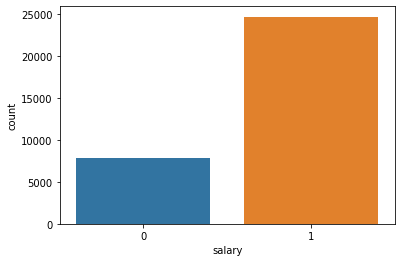

In [64]:
sns.countplot(df['salary'])
plt.show()

In [57]:
X = df.drop(['salary'], axis =1)
Y= df['salary']

In [59]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, Y)

print('Original dataset shape', len(Y))
print('Resample dataset shape', len(y_smote))

Original dataset shape 32561
Resample dataset shape 49440


In [62]:
y_smote.value_counts()

0    24720
1    24720
Name: salary, dtype: int64

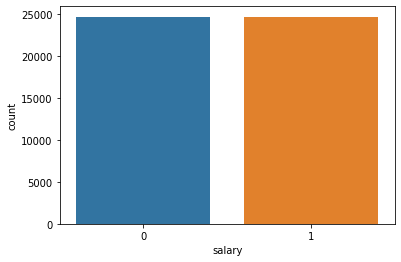

In [63]:
sns.countplot(y_smote)
plt.show()

In [65]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size= 0.2, random_state = 101)

In [70]:
X_train.shape

(39552, 111)

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
sc = StandardScaler()

In [74]:
X_train = sc.fit_transform(X_train)

In [75]:
X_test = sc.transform(X_test)

In [76]:
print("Train data shape: {}".format(X_train.shape))
print("Test data shape: {}".format(X_test.shape))

Train data shape: (39552, 111)
Test data shape: (9888, 111)


In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
lg_model = LogisticRegression()

In [79]:
lg_model.fit(X_train, y_train)

LogisticRegression()

In [80]:
y_pred = lg_model.predict(X_test)

In [81]:
result = {
    'Actual': y_test,
    'Predicted': y_pred
}

In [82]:
pd.DataFrame(result)

,Actual,Predicted
3757,1,1
20247,1,1
47001,0,0
23785,1,1
34601,0,0
...,...,...
2603,0,1
26232,1,1
30254,0,0
39120,0,0


In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [84]:
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, y_pred)))
print("Classification Report:\n {}".format(classification_report(y_test, y_pred)))

Accuracy Score: 0.870044498381877
Confusion Matrix:
 [[4219  688]
 [ 597 4384]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      4907
           1       0.86      0.88      0.87      4981

    accuracy                           0.87      9888
   macro avg       0.87      0.87      0.87      9888
weighted avg       0.87      0.87      0.87      9888



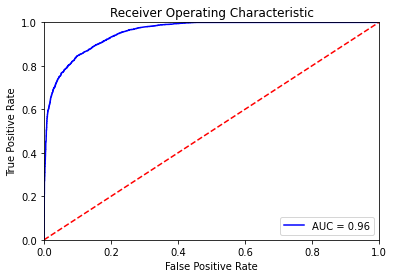

In [88]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = lg_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()